**PREPROCESSING METHODS**



*   Binarization
* Scaling
*   Normalization 

* Mean Removal 
* etc..




**1. Binarization**

In [1]:
from sklearn import preprocessing

In [2]:
import numpy as np

In [7]:
data = np.array([[2.2, 4.2, 1.8], [7.3,8.2, 1.4], [5.3,6.4,3.4]])

In [8]:
bindata = preprocessing.Binarizer(threshold=2.5).transform(data)

print('Binarized data: \n\n', bindata)

Binarized data: 

 [[0. 1. 0.]
 [1. 1. 0.]
 [1. 1. 1.]]


**2. Mean Removal (Standardization)**

In [9]:
print('mean (before) = ', data.mean(axis = 0))

print('standard deviation (before)', data.std(axis=0))

mean (before) =  [4.93333333 6.26666667 2.2       ]
standard deviation (before) [2.09814733 1.63571255 0.86409876]


In [10]:
scaled_data = preprocessing.scale(data)

print('mean (after) =', scaled_data.mean(axis = 0))

print('standard deviation (after) =', scaled_data.std(axis = 0))

mean (after) = [-1.48029737e-16  5.36607795e-16  2.22044605e-16]
standard deviation (after) = [1. 1. 1.]


**3. Scaling**



*   StandardScaler => features with mean = 0 and variance = 1
*   MinMaxScaler => features in a 0 to 1 range
* Normalizer => feature vector to a Euclidean length = 1





In [11]:
data

array([[2.2, 4.2, 1.8],
       [7.3, 8.2, 1.4],
       [5.3, 6.4, 3.4]])

In [12]:
minmax_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
data_minmax = minmax_scaler.fit_transform(data)

print("MinMaxScaler applied on the data:\n", data_minmax)

MinMaxScaler applied on the data:
 [[0.         0.         0.2       ]
 [1.         1.         0.        ]
 [0.60784314 0.55       1.        ]]


**4. Normalization**

-- bringing the values of each feature vector on a common scale

* L1 - Least Absolute Deviation - sum of absolute values(on each row) = 1; it is insensitive to outliers

* L2 - Least Squares - sum of squares (on each row) = 1; takes outliers in consideration during training

In [19]:
data

array([[2.2, 4.2, 1.8],
       [7.3, 8.2, 1.4],
       [5.3, 6.4, 3.4]])

In [16]:
data_L1 = preprocessing.normalize(data, norm = 'l1')

In [17]:
data_L2 = preprocessing.normalize(data, norm = 'l2')

In [18]:
print('L1- normalized data:\n', data_L1)
print('L2- normalized data:\n', data_L2)

L1- normalized data:
 [[0.26829268 0.51219512 0.2195122 ]
 [0.43195266 0.4852071  0.08284024]
 [0.35099338 0.42384106 0.22516556]]
L2- normalized data:
 [[0.43379765 0.82815916 0.35492535]
 [0.65958769 0.74090672 0.12649627]
 [0.59031172 0.71282925 0.37869054]]


**Label Encoding**

In [20]:
from sklearn import preprocessing

labels = ['setosa', 'versicolor', 'virginica']


In [23]:
encoder = preprocessing.LabelEncoder()
encoder.fit(labels)

LabelEncoder()

In [24]:
for i, items in enumerate(encoder.classes_):
  print(items, '=>', i)

setosa => 0
versicolor => 1
virginica => 2


In [25]:
more_labels = ['versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor']

In [26]:
more_labels_encoded = encoder.transform(more_labels)

In [28]:
print("more labels =", more_labels)
print("more labels encoded = ", list(more_labels_encoded))

more labels = ['versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor']
more labels encoded =  [1, 1, 2, 0, 1]


**Automatic Feature Selection**

* to reduce dimensionality
* common methods:
    * univariate statistics
    * model-based selection
    * iterative selection

**1. Univariate Statistics**

* determine the relationship between each feature and output(target)
* only the features with highest confidence are selected
* *SelectKBest* - selecting K no. of features
* *SelectPercentile* - selection in made based on a percentage of the original features

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [32]:
cancer = load_breast_cancer()

rng = np.random.RandomState(42)

noise = rng.normal(size = (len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state = 42, test_size = 0.5)


In [33]:
select = SelectPercentile(percentile=50)

In [34]:
select.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [35]:
X_train_selected = select.transform(X_train)

In [39]:
print("X_train.shape is :{}".format(X_train.shape))

X_train.shape is :(284, 80)


In [41]:
print("X_train.selected.shape is :{}".format(X_train_selected.shape))

X_train.selected.shape is :(284, 40)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False False False False False False  True False False False  True
 False False False False False False  True False False False  True False
 False False  True False False False  True  True  True False False False
  True  True False False False False  True  True]


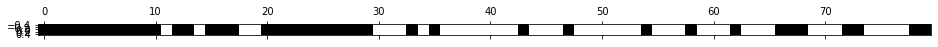

In [46]:
mask = select.get_support()

print(mask)

plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')

In [51]:
X_test_selected = select.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


print("the score of logestic regression on all features : {:.3f}".format(logreg.score(X_test, y_test)))

the score of logestic regression on all features : 0.940


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [53]:
 logreg.fit(X_train_selected, y_train)
 print("the score of logestic regression on all features : {:.3f}".format(logreg.score(X_train_selected, y_train)))

the score of logestic regression on all features : 0.961


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [54]:
# 1. the score of logestic regression on all features : 0.940
# 2. the score of logestic regression on all features : 0.961

**2. Model-Based Feature Selection**

* uses a supervised model to determine the importance of each features
* keeps the most importance features
* needs a measure for the importance of features (DT and RF have the 'feature_importances' attribute)

In [58]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [59]:
select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state =42), threshold = 'median')

In [62]:
select.fit(X_train, y_train)

X_train_s = select.transform(X_train)

print("the shape of X_train is:", X_train.shape)
print("the shape of X_train is:", X_train_s.shape)

the shape of X_train is: (284, 80)
the shape of X_train is: (284, 40)


Text(0.5, 0, 'index of features')

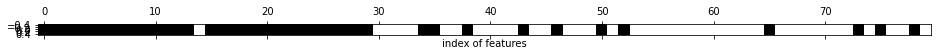

In [63]:
mask = select.get_support()

plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')

plt.xlabel("index of features")

In [66]:
X_test_s = select.transform(X_test)

score = LogisticRegression().fit(X_train_s, y_train).score(X_test_s, y_test)

print("the score of the Logistic Regression with the selected features on the test set :{:.3f}".format(score))

the score of the Logistic Regression with the selected features on the test set :0.944


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#the score of the Logistic Regression with the selected features on the test set :0.944


**One-Hot Encoding**

* used on categorical variables 
* it replaces a categorical variable/ feature with one or more features that will take the value of 0 or 1

* increases data burden
* increases the efficiency of the process